<a href="https://colab.research.google.com/github/MayerT1/Confusion_Matrix_Colab/blob/master/K_Fold_ROC_Cross_Validation_Stats_4_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [0]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
#create a symbolic link for pointing to /content/mnt/My Drive/Colab Notebooks
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path) 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [0]:
%cd /content/notebooks/
!ls

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import KFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


from scipy import interp

from google.colab import files

import seaborn as sns

import pandas as pd
from pandas import DataFrame

import numpy as np
from numpy import random


#from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Cross Validation: 
https://colab.research.google.com/drive/11QutM7NpOEvGVrfOxw8ZzpbXtzKcRGEm#scrollTo=YxjFRxTneZ27&forceEdit=true&sandboxMode=true

## Read in data and define variables by alg.

In [0]:
df = pd.read_csv('Sample_Points_CSV_all_pts_4_10.csv')
header = ['system:index',	'Date_str', 	'WaterPlane',	'bmaxGeeGrd',	'bmaxSnapRtc',	'edgeGeeGrd',	'edgeSnapRtc',	'latitude_209564535',	'longitude_209564535',	'.geo']

df_title = pd.DataFrame(df, columns=header)
################ 
X = df_title["WaterPlane"]
X = np.array(X)
# print("X",X)
y = df_title["bmaxGeeGrd"]
y = np.array(y)
# print("y" ,y)
z = df_title["bmaxSnapRtc"]
z = np.array(X)
# print("X",X)
a = df_title["edgeGeeGrd"]
a = np.array(y)
# print("y" ,y)
b = df_title["edgeSnapRtc"]
b = np.array(y)
# print("y" ,y)

################

class_names = {"water", "not water"}

## K-Fold the data sets-->Stratified K Folds

there are several K fold methods that were tested, swap the comments on  the blocks to test the performance by varying the folds.

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold


# ###################StratifiedKFold

# # skf = StratifiedKFold(n_splits=10)
# # # skf.get_n_splits(X, y)
# skf = StratifiedKFold(n_splits=10, random_state=2652124, shuffle=True)
# # print(skf)
# for train_index, validation_index in skf.split(X, y):
#    print("TRAIN_X:", X[train_index], "VALIDATION_X:", X[validation_index])
#    print("TRAIN_y:", y[train_index], "VALIDATION_y:", y[validation_index])
#    print("TRAIN_z:", z[train_index], "VALIDATION_z:", z[validation_index])
#    print("TRAIN_a:", a[train_index], "VALIDATION_a:", a[validation_index])
#    print("TRAIN_b:", b[train_index], "VALIDATION_b:", b[validation_index])
#    X_train, X_validation = X[train_index], X[validation_index]
#    y_train, y_validation = y[train_index], y[validation_index]
#    z_train, z_validation = z[train_index], z[validation_index]
#    a_train, a_validation = a[train_index], a[validation_index]
#    b_train, b_validation = b[train_index], b[validation_index]

############strat kfold by each alg
skf = StratifiedKFold(n_splits=10, random_state=2652124, shuffle=True)
# print(skf)
for train_index, validation_index in skf.split(X, y):
   print("TRAIN_X:", X[train_index], "VALIDATION_X:", X[validation_index])
   print("TRAIN_y:", y[train_index], "VALIDATION_y:", y[validation_index])
   X_train, X_validation = X[train_index], X[validation_index]
   y_train, y_validation = y[train_index], y[validation_index]

###########
skf_z = StratifiedKFold(n_splits=10, random_state=2652124, shuffle=True)
# print("skf_z", skf_z)
for train_index, validation_index in skf_z.split(X, z):
   print("TRAIN_X:", X[train_index], "VALIDATION_X:", X[validation_index])
   print("TRAIN_z:", z[train_index], "VALIDATION_z:", z[validation_index])
   X_train, X_validation = X[train_index], X[validation_index]
   z_train, z_validation = z[train_index], z[validation_index]

###########
skf_a = StratifiedKFold(n_splits=10, random_state=2652124, shuffle=True)
# print(skf_a)
for train_index, validation_index in skf_a.split(X, a):
   print("TRAIN_X:", X[train_index], "VALIDATION_X:", X[validation_index])
   print("TRAIN_a:", a[train_index], "VALIDATION_a:", a[validation_index])
   X_train, X_validation = X[train_index], X[validation_index]
   a_train, a_validation = a[train_index], a[validation_index]

############

skf_b = StratifiedKFold(n_splits=10, random_state=2652124, shuffle=True)
# print(skf_b)
for train_index, validation_index in skf_b.split(X, b):
   print("TRAIN_X:", X[train_index], "VALIDATION_X:", X[validation_index])
   print("TRAIN_b:", b[train_index], "VALIDATION_b:", b[validation_index])
   X_train, X_validation = X[train_index], X[validation_index]
   b_train, b_validation = b[train_index], b[validation_index]



# ###################repeated k fold
# rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=2652124)
# print(rkf)
# ##################
# for train_index, validation_index in rkf.split(X):
#    print("TRAIN_X:", X[train_index], "VALIDATION_X:", X[validation_index])
#    print("TRAIN_y:", y[train_index], "VALIDATION_y:", y[validation_index])
#    print("TRAIN_z:", z[train_index], "VALIDATION_z:", z[validation_index])
#    print("TRAIN_a:", a[train_index], "VALIDATION_a:", a[validation_index])
#    print("TRAIN_b:", b[train_index], "VALIDATION_b:", b[validation_index])
#    X_train, X_validation = X[train_index], X[validation_index]
#    y_train, y_validation = y[train_index], y[validation_index]
#    z_train, z_validation = z[train_index], z[validation_index]
#    a_train, a_validation = a[train_index], a[validation_index]
#    b_train, b_validation = b[train_index], b[validation_index]


###########standard k-fold

# kf = KFold(n_splits=10, random_state=None, shuffle=True)  
# print(kf)
# ##################
# for train_index, validation_index in kf.split(X):
#    print("TRAIN_X:", X[train_index], "VALIDATION_X:", X[validation_index])
#    print("TRAIN_y:", y[train_index], "VALIDATION_y:", y[validation_index])
#    print("TRAIN_z:", z[train_index], "VALIDATION_z:", z[validation_index])
#    print("TRAIN_a:", a[train_index], "VALIDATION_a:", a[validation_index])
#    print("TRAIN_b:", b[train_index], "VALIDATION_b:", b[validation_index])
#    X_train, X_validation = X[train_index], X[validation_index]
#    y_train, y_validation = y[train_index], y[validation_index]
#    z_train, z_validation = z[train_index], z[validation_index]
#    a_train, a_validation = a[train_index], a[validation_index]
#    b_train, b_validation = b[train_index], b[validation_index]


TRAIN_X: [0 0 0 ... 1 1 1] VALIDATION_X: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1]
TRAIN_y: [1 0 1 ... 1 1 1] VALIDATION_y: [0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 

## Reshape the folded data / Accuracy assessment for the folds

In [0]:
#Example is from SKLearn's website. Please see http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier


#####train reshape
X_train= X_train.reshape(-1, 1)
print("X_train new", X_train.shape)
y_train= y_train.reshape(-1, 1)
print("y_train new", y_train.shape)
z_train= z_train.reshape(-1, 1)
print("z_train new", z_train.shape)
a_train= a_train.reshape(-1, 1)
print("a_train new", a_train.shape)
b_train= b_train.reshape(-1, 1)
print("b_train new", b_train.shape)

####validationreshape
X_validation = X_validation.reshape(-1, 1)
print("X_validation new", X_validation.shape)
y_validation = y_validation.reshape(-1, 1)
print("y_validation new", y_validation.shape)
z_validation = z_validation.reshape(-1, 1)
print("z_validation new",z_validation.shape)
a_validation = a_validation.reshape(-1, 1)
print("a_validation new", a_validation.shape)
b_validation = b_validation.reshape(-1, 1)
print("b_validation new", b_validation.shape)


#########Stats
print("-")
print("accuracy scores")
print("-")
print('bmaxGeeGrd')
print("acc_train_y", accuracy_score(X_train, y_train))
print("acc_validation_y", accuracy_score(X_validation, y_validation))

print("-")
print('bmaxSnapRtc')
print("acc_train_z", accuracy_score(X_train, z_train))
print("acc_validation_z", accuracy_score(X_validation, z_validation))

print("-")
print('edgeGeeGrd')
print("acc_train_a", accuracy_score(X_train, a_train))
print("acc_validation_a", accuracy_score(X_validation, a_validation))

print("-")
print('edgeSnapRtc')
print("acc_train_b", accuracy_score(X_train, b_train))
print("acc_validation_b", accuracy_score(X_validation, b_validation))


X_train new (2614, 1)
y_train new (2614, 1)
z_train new (2614, 1)
a_train new (2614, 1)
b_train new (2614, 1)
X_validation new (290, 1)
y_validation new (290, 1)
z_validation new (290, 1)
a_validation new (290, 1)
b_validation new (290, 1)
-
accuracy scores
-
bmaxGeeGrd
acc_train_y 0.9211935730680949
acc_validation_y 0.9172413793103448
-
bmaxSnapRtc
acc_train_z 0.9257842387146136
acc_validation_z 0.7103448275862069
-
edgeGeeGrd
acc_train_a 0.9211935730680949
acc_validation_a 0.9172413793103448
-
edgeSnapRtc
acc_train_b 0.9211935730680949
acc_validation_b 0.9172413793103448


# Model Prediction-> Logistic Regresion

## Bmax Gee Grd Model Prediction and output

clf_LR_pred (290,)
cnf_matrix_clf_LR_pred [[ 61  10]
 [ 14 205]]
Accuracy: 0.9172413793103448
Precision: 0.8591549295774648
Recall: 0.8133333333333334
-
clf score 0.9211935730680949
cross_val_score clftrain [0.75954198 0.91221374 0.88549618 0.89312977 1.         0.90421456
 1.         0.99616858 0.91187739 0.95019157]
cross_val_score clf [0.75954198 0.91221374 0.88549618 0.89312977 1.         0.90421456
 1.         0.99616858 0.91187739 0.95019157]
-


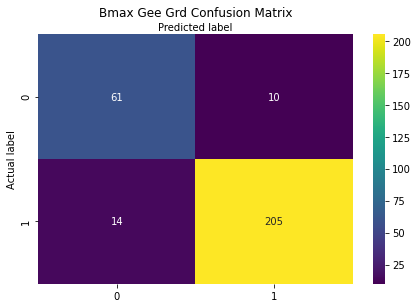

In [0]:


clf_LR = LogisticRegression(random_state=0).fit(X_train.reshape(-1, 1), y_train.ravel())
clf_LR_pred = clf_LR.predict(X_validation)
print("clf_LR_pred", clf_LR_pred.shape)

cnf_matrix = np.flip(metrics.confusion_matrix(y_validation, clf_LR_pred)).T
print('cnf_matrix_clf_LR_pred', cnf_matrix)

## CM figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Bmax Gee Grd Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print("Accuracy:",metrics.accuracy_score(y_validation, clf_LR_pred))
print("Precision:",metrics.precision_score(y_validation, clf_LR_pred))
print("Recall:",metrics.recall_score(y_validation, clf_LR_pred))
print("-")
print("clf score", clf_LR.score(X_train, y_train))
print("cross_val_score clftrain", cross_val_score(clf_LR, X_train, y_train.ravel(), cv=10))
print("cross_val_score clf", cross_val_score(clf_LR, X_train.reshape(-1, 1), y_train.ravel(), cv=10))
print("-")
# print("cross_val_score clf____TEST", cross_val_score(clf_LR, y_validation, clf_LR_pred, cv=10))
# print("-")


## bmaxSnapRtc Model Prediction and output

clf_LR_pred (290,)
cnf_matrix_clf_LR_pred [[ 30  41]
 [ 43 176]]
Accuracy: 0.7103448275862069
Precision: 0.4225352112676056
Recall: 0.410958904109589
-
clf score 0.9257842387146136
cross_val_score clftrain [0.84732824 0.84732824 0.86641221 0.88167939 1.         0.97701149
 1.         0.98850575 0.90804598 0.94252874]
cross_val_score clf [0.84732824 0.84732824 0.86641221 0.88167939 1.         0.97701149
 1.         0.98850575 0.90804598 0.94252874]
-


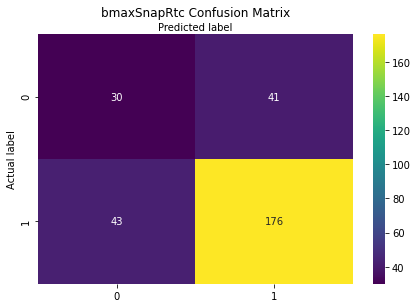

In [0]:

clf_LR = LogisticRegression(random_state=0).fit(X_train.reshape(-1, 1), z_train.ravel())
clf_LR_pred = clf_LR.predict(X_validation)
print("clf_LR_pred", clf_LR_pred.shape)

cnf_matrix = np.flip(metrics.confusion_matrix(z_validation, clf_LR_pred)).T
print('cnf_matrix_clf_LR_pred', cnf_matrix)

## CM figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('bmaxSnapRtc Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print("Accuracy:",metrics.accuracy_score(z_validation, clf_LR_pred))
print("Precision:",metrics.precision_score(z_validation, clf_LR_pred))
print("Recall:",metrics.recall_score(z_validation, clf_LR_pred))
print("-")
print("clf score", clf_LR.score(X_train, z_train))
print("cross_val_score clftrain", cross_val_score(clf_LR, X_train, z_train.ravel(), cv=10))
print("cross_val_score clf", cross_val_score(clf_LR, X_train.reshape(-1, 1), z_train.ravel(), cv=10))
print("-")


## edgeGeeGrd Model Prediction and output

clf_LR_pred (290,)
cnf_matrix_clf_LR_pred [[ 61  10]
 [ 14 205]]
Accuracy: 0.9172413793103448
Precision: 0.8591549295774648
Recall: 0.8133333333333334
-
clf score 0.9211935730680949
cross_val_score clftrain [0.75954198 0.91221374 0.88549618 0.89312977 1.         0.90421456
 1.         0.99616858 0.91187739 0.95019157]
cross_val_score clf [0.75954198 0.91221374 0.88549618 0.89312977 1.         0.90421456
 1.         0.99616858 0.91187739 0.95019157]
-


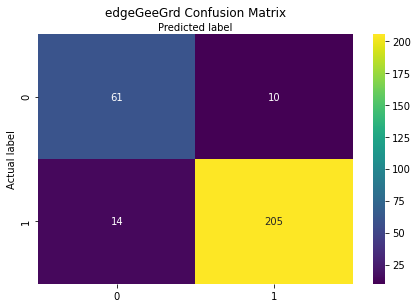

In [0]:
clf_LR = LogisticRegression(random_state=0).fit(X_train.reshape(-1, 1), a_train.ravel())
clf_LR_pred = clf_LR.predict(X_validation)
print("clf_LR_pred", clf_LR_pred.shape)

cnf_matrix = np.flip(metrics.confusion_matrix(a_validation, clf_LR_pred)).T
print('cnf_matrix_clf_LR_pred', cnf_matrix)

## CM figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('edgeGeeGrd Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print("Accuracy:",metrics.accuracy_score(a_validation, clf_LR_pred))
print("Precision:",metrics.precision_score(a_validation, clf_LR_pred))
print("Recall:",metrics.recall_score(a_validation, clf_LR_pred))
print("-")
print("clf score", clf_LR.score(X_train, a_train))
print("cross_val_score clftrain", cross_val_score(clf_LR, X_train, a_train.ravel(), cv=10))
print("cross_val_score clf", cross_val_score(clf_LR, X_train.reshape(-1, 1), a_train.ravel(), cv=10))
print("-")

## edgeSnapRtc Model Prediction and output

clf_LR_pred (290,)
cnf_matrix_clf_LR_pred [[ 61  10]
 [ 14 205]]
Accuracy: 0.9172413793103448
Precision: 0.8591549295774648
Recall: 0.8133333333333334
-
clf score 0.9211935730680949
cross_val_score clftrain [0.75954198 0.91221374 0.88549618 0.89312977 1.         0.90421456
 1.         0.99616858 0.91187739 0.95019157]
cross_val_score clf [0.75954198 0.91221374 0.88549618 0.89312977 1.         0.90421456
 1.         0.99616858 0.91187739 0.95019157]
-


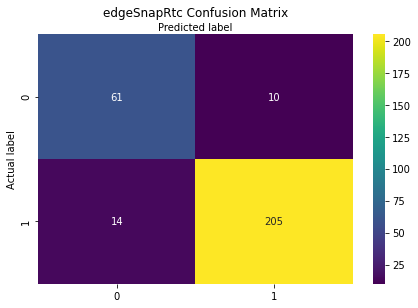

In [0]:

clf_LR = LogisticRegression(random_state=0).fit(X_train.reshape(-1, 1), b_train.ravel())
clf_LR_pred = clf_LR.predict(X_validation)
print("clf_LR_pred", clf_LR_pred.shape)

cnf_matrix = np.flip(metrics.confusion_matrix(b_validation, clf_LR_pred)).T
print('cnf_matrix_clf_LR_pred', cnf_matrix)

## CM figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('edgeSnapRtc Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print("Accuracy:",metrics.accuracy_score(b_validation, clf_LR_pred))
print("Precision:",metrics.precision_score(b_validation, clf_LR_pred))
print("Recall:",metrics.recall_score(b_validation, clf_LR_pred))
print("-")
print("clf score", clf_LR.score(X_train, b_train))
print("cross_val_score clftrain", cross_val_score(clf_LR, X_train, b_train.ravel(), cv=10))
print("cross_val_score clf", cross_val_score(clf_LR, X_train.reshape(-1, 1), b_train.ravel(), cv=10))
print("-")

### Other example of Models tested, uncomment out the blocks to test out the models

In [0]:
####
# lasso = linear_model.Lasso()
# print("cross_val_score lasso", cross_val_score(lasso, X_train, y_train, cv=6))

#############LogisticRegression################################################################################
####https://towardsdatascience.com/real-world-implementation-of-logistic-regression-5136cefb8125
# clf = LogisticRegression(random_state=0).fit(X, y.reshape(-1, 1))

# clf_LR = LogisticRegression(random_state=0).fit(X_train.reshape(-1, 1), y_train.ravel())
# clf_LR_pred = clf_LR.predict(X_validation)
# print("clf_LR_pred", clf_LR_pred.shape)

# cnf_matrix = np.flip(metrics.confusion_matrix(y_validation, clf_LR_pred)).T
# print('bmaxGeeGrd')
# print('cnf_matrix_clf_LR_pred', cnf_matrix)

# ## CM figure
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')


# print("Accuracy:",metrics.accuracy_score(y_validation, clf_LR_pred))
# print("Precision:",metrics.precision_score(y_validation, clf_LR_pred))
# print("Recall:",metrics.recall_score(y_validation, clf_LR_pred))
# print("-")
# print("clf score", clf_LR.score(X_train, y_train))
# print("cross_val_score clftrain", cross_val_score(clf_LR, X_train, y_train.ravel(), cv=10))
# print("cross_val_score clf", cross_val_score(clf_LR, X_train.reshape(-1, 1), y_train.ravel(), cv=10))
# print("-")
# print("cross_val_score clf____TEST", cross_val_score(clf_LR, y_validation, clf_LR_pred, cv=10))
# print("-")


# #######LinearRegression##########################################################################################

# lm_LR = linear_model.LinearRegression()
# k_predictions = cross_val_predict(lm_LR, X_train.reshape(-1, 1), y_train.ravel(), cv=10)
# print("linear_model.LinearRegression k_predictions:",k_predictions)

# # print("linear_model.LinearRegression predicition validation confusion matrix", np.flip(metrics.confusion_matrix(y_validation, KNeighborsClassifier_pred).T))
# # print(metrics.classification_report(y_validation, KNeighborsClassifier_pred))

# #####################KNeighborsClassifier##########################################################################
# ####https://scipy-lectures.org/packages/scikit-learn/index.html
# print("-")
# clf_k = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
# clf_k_predictions = cross_val_predict(clf_k, X_train.reshape(-1, 1), y_train.ravel(), cv=10)
# # print("KNeighborsClassifier prediction", clf_k_predictions)


# KNeighborsClassifier_pred = clf_k.predict(X_validation)
# # print("prediction for y", KNeighborsClassifier_pred )
# print("KNeighborsClassifier", np.flip(metrics.confusion_matrix(y_validation, KNeighborsClassifier_pred).T)) # KNeighborsClassifier_pred
# print(metrics.classification_report(y_validation, KNeighborsClassifier_pred))

# print(y_validation.size)
# print(KNeighborsClassifier_pred.size)

# ROC

## BmaxGeeGrd kfolds

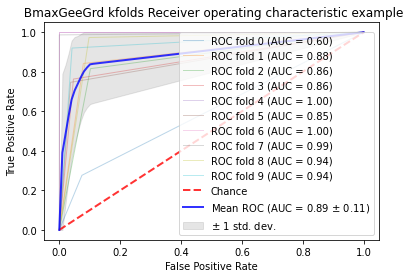

In [0]:
# Classification and ROC analysis

#Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state= None)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
#########BmaxGEEGRD
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train].reshape(-1, 1), y[train].ravel())
    viz = plot_roc_curve(classifier, X[test].reshape(-1, 1), y[test].reshape(-1, 1),
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title=" BmaxGeeGrd kfolds Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()


## bmaxSnapRtc kfolds

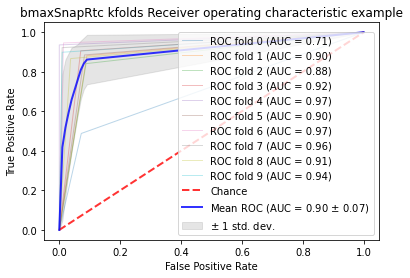

In [0]:
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state= None)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
#########BmaxGEEGRD
for i, (train, test) in enumerate(cv.split(X, z)):
    classifier.fit(X[train].reshape(-1, 1), y[train].ravel())
    viz = plot_roc_curve(classifier, X[test].reshape(-1, 1), y[test].reshape(-1, 1),
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="bmaxSnapRtc kfolds Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

## edgeGeeGrd kfolds

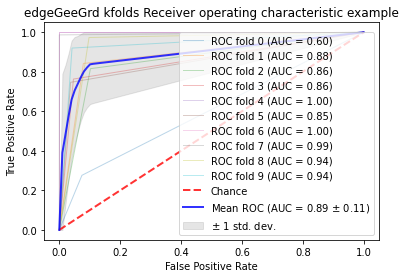

In [0]:

cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state= None)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
#########BmaxGEEGRD
for i, (train, test) in enumerate(cv.split(X, a)):
    classifier.fit(X[train].reshape(-1, 1), y[train].ravel())
    viz = plot_roc_curve(classifier, X[test].reshape(-1, 1), y[test].reshape(-1, 1),
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="edgeGeeGrd kfolds Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

## edgeSnapRtc kfolds

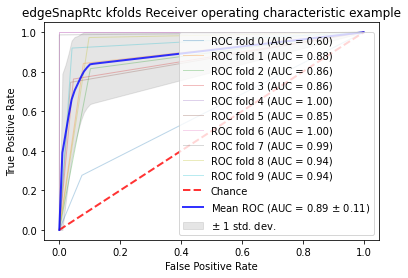

In [0]:

cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state= None)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
#########BmaxGEEGRD
for i, (train, test) in enumerate(cv.split(X, b)):
    classifier.fit(X[train].reshape(-1, 1), y[train].ravel())
    viz = plot_roc_curve(classifier, X[test].reshape(-1, 1), y[test].reshape(-1, 1),
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="edgeSnapRtc kfolds Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()